In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import preprocessing 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url,sep=",")
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [ ]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url,sep=",", usecols=[1])
df = data.iloc[::-1]
df

,Consumption
4382,1107.11488
4381,1215.44897
4380,1295.08753
4379,1299.86398
4378,1263.94091
...,...
4,1477.13100
3,1457.21700
2,1442.53300
1,1380.52100


In [ ]:
epoch_numbers=[10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]

In [ ]:
for l in range(len(epoch_numbers)):
  epoch_columns= ()
  newdf=pd.DataFrame(columns = epoch_columns)
  k=0
  for i in range(len(df)-(epoch_numbers[l])):
    simple_list = np.zeros(shape=(0,epoch_numbers[l]+1))
    for j in range(k,(epoch_numbers[l]+k+1)):
      simple_list = np.append(simple_list,df.iloc[j].values[0])
    listdf= pd.DataFrame(data=(simple_list))
    
    newdf = pd.concat([newdf,listdf.T] )
    k=k+1
  newdf.dropna(inplace=True)
  newdf.reset_index(drop=True, inplace=True)
  print(newdf.head())
  newdf.to_csv(r'/content/data_epoch' + str(epoch_numbers[l]) + '.csv',index=False)

           0           1           2   ...          8           9           10
0  1107.11488  1215.44897  1295.08753  ...  1272.17085  1423.23782  1520.37206
1  1215.44897  1295.08753  1299.86398  ...  1423.23782  1520.37206  1559.68569
2  1295.08753  1299.86398  1263.94091  ...  1520.37206  1559.68569  1586.48230
3  1299.86398  1263.94091  1130.11683  ...  1559.68569  1586.48230  1578.69079
4  1263.94091  1130.11683  1111.28338  ...  1586.48230  1578.69079  1297.21916

[5 rows x 11 columns]
           0           1           2   ...          9           10          11
0  1107.11488  1215.44897  1295.08753  ...  1423.23782  1520.37206  1559.68569
1  1215.44897  1295.08753  1299.86398  ...  1520.37206  1559.68569  1586.48230
2  1295.08753  1299.86398  1263.94091  ...  1559.68569  1586.48230  1578.69079
3  1299.86398  1263.94091  1130.11683  ...  1586.48230  1578.69079  1297.21916
4  1263.94091  1130.11683  1111.28338  ...  1578.69079  1297.21916  1382.87708

[5 rows x 12 columns]
      

In [ ]:
neighbors = np.arange(1, 20, 2)
scores = []
accuracy_knn = []
RMS_knn = []

In [ ]:
for i in range(len(epoch_numbers)):
  df=pd.read_csv('/content/data_epoch' + str(i+10) + '.csv')
  print("Epoch number:", i+8)
  min_max_scaler = preprocessing.MinMaxScaler()
  np_scaled = min_max_scaler.fit_transform(df)
  df_normalized = pd.DataFrame(np_scaled)
  df=df_normalized
  X= df.iloc[:,:-1]
  y=df.iloc[:,-1]
  X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size = 0.3)
  scores = []
  for k in neighbors:
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(X_tr, y_tr)
    score = cross_val_score(clf, X_tr, y_tr, cv = 10)
    scores.append(score.mean())
  
  mse = [1-x for x in scores]
  optimal_k = neighbors[mse.index(min(mse))]
  print("Optimal K: ", optimal_k)
  clf_optimal = KNeighborsRegressor(n_neighbors = optimal_k)
  clf_optimal.fit(X_tr, y_tr)
  y_pred = clf_optimal.predict(X_test)
  acc = clf_optimal.score(X_test, y_test)
  print("Accuracy: ", acc*100)
  accuracy_knn.append(acc*100)
  RMS_knn.append(mean_squared_error(y_test, y_pred))
  print("RMS Error: ", mean_squared_error(y_test, y_pred))

Epoch number: 8
Optimal K:  7
Accuracy:  90.16752480076212
RMS Error:  0.0036458679704772534
Epoch number: 9
Optimal K:  5
Accuracy:  86.50674168763437
RMS Error:  0.004798186952010141
Epoch number: 10
Optimal K:  3
Accuracy:  88.54567897485556
RMS Error:  0.00422271256554687
Epoch number: 11
Optimal K:  5
Accuracy:  87.81663418247996
RMS Error:  0.0043021774771103615
Epoch number: 12
Optimal K:  5
Accuracy:  88.34796504820737
RMS Error:  0.004276280531849247
Epoch number: 13
Optimal K:  5
Accuracy:  86.44961020030468
RMS Error:  0.005059602992907022
Epoch number: 14
Optimal K:  5
Accuracy:  87.5665521962482
RMS Error:  0.0044735600864486665
Epoch number: 15
Optimal K:  5
Accuracy:  88.12602469608404
RMS Error:  0.004270612272181561
Epoch number: 16
Optimal K:  5
Accuracy:  86.09241597013906
RMS Error:  0.004994099504112002
Epoch number: 17
Optimal K:  5
Accuracy:  86.44484932238996
RMS Error:  0.005066767493843308
Epoch number: 18
Optimal K:  5
Accuracy:  88.03001838160827
RMS Error: 

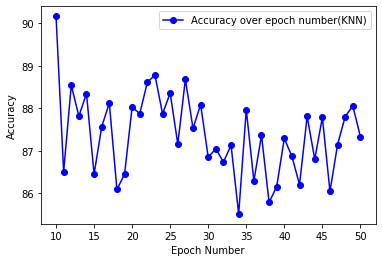

In [ ]:
plt.plot(epoch_numbers,accuracy_knn,'b-o',label='Accuracy over epoch number(KNN)');
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

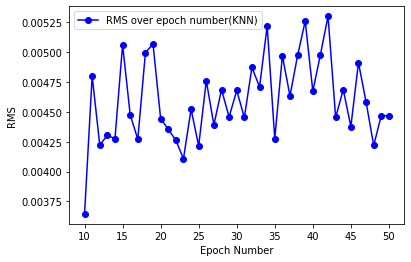

In [ ]:
plt.plot(epoch_numbers,RMS_knn,'b-o',label='RMS over epoch number(KNN)');
plt.xlabel('Epoch Number')
plt.ylabel('RMS')
plt.legend()
plt.show()

In [ ]:
max(accuracy_knn)

90.16752480076212

In [ ]:
min(RMS_knn)

0.0036458679704772534

In [ ]:
acucuracy_mlr = []
mse_mlr = []

In [ ]:
for i in range(len(epoch_numbers)):
  dataset=pd.read_csv('/content/data_epoch' + str(i+10) + '.csv')
  print("Epoch number:", i+10)
  min_max_scaler = preprocessing.MinMaxScaler()
  np_scaled = min_max_scaler.fit_transform(dataset)
  df_normalized = pd.DataFrame(np_scaled)
  dataset=df_normalized
  X= dataset.iloc[:, :-1].values
  Y=dataset.iloc[:, -1].values
  regressor = LinearRegression()
  regressor.fit(X,Y)
  accuracy = regressor.score(X,Y)*100
  print(accuracy)
  acucuracy_mlr.append(accuracy)
  y_pred = regressor.predict(X)
  mse_mlr.append(mean_squared_error(Y, y_pred))

Epoch number: 10
82.25838682372756
Epoch number: 11
82.35993528360656
Epoch number: 12
82.50623587497621
Epoch number: 13
82.88092791285436
Epoch number: 14
84.0186699066691
Epoch number: 15
85.01795788371189
Epoch number: 16
85.0419310798218
Epoch number: 17
85.1802386016314
Epoch number: 18
85.22599509974908
Epoch number: 19
85.31484935895791
Epoch number: 20
85.48108649361058
Epoch number: 21
86.046013495958
Epoch number: 22
86.59070146542105
Epoch number: 23
86.5910814945284
Epoch number: 24
86.59687392027617
Epoch number: 25
86.60685076645672
Epoch number: 26
86.60055751512404
Epoch number: 27
86.67809372018068
Epoch number: 28
86.91103460235807
Epoch number: 29
87.1105361121334
Epoch number: 30
87.14386211477047
Epoch number: 31
87.1607959712662
Epoch number: 32
87.17581211205048
Epoch number: 33
87.2064009596706
Epoch number: 34
87.22917407116661
Epoch number: 35
87.35714351793676
Epoch number: 36
87.52623433386817
Epoch number: 37
87.54791580344406
Epoch number: 38
87.561621501

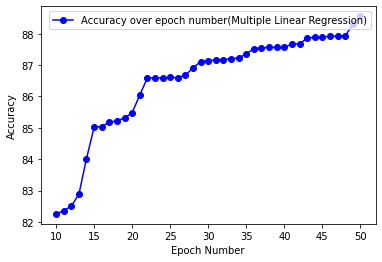

In [ ]:
plt.plot(epoch_numbers,acucuracy_mlr,'b-o',label='Accuracy over epoch number(Multiple Linear Regression)');
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
max(acucuracy_mlr)

88.5568403478553

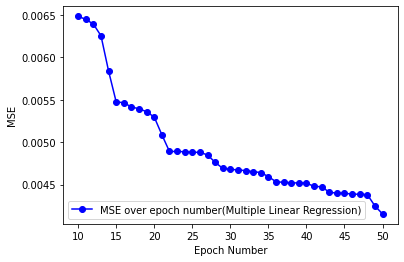

In [ ]:
plt.plot(epoch_numbers,mse_mlr,'b-o',label='MSE over epoch number(Multiple Linear Regression)');
plt.xlabel('Epoch Number')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
min(mse_mlr)

0.00415324681978744